In [1]:
# Import required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.optimize as opt
from sklearn.metrics import accuracy_score
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Load the file "land_type.csv" into a dataframe

df = pd.read_csv("land_type.csv")

# Assign the variable 'X' to the predictors & 'y' to the response 

X = df.drop("land_type", axis=1).values


y = df['land_type']

In [3]:
# Split the dataset into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8, random_state=22)



In [4]:
# Make a logistic regression model with below given C value

degree = 10

#Make a list of 6 C values to vary the range of regularization such that you get the best accuracy

Clist = [1e-15,1e-5,1e-3,1,1e3,1e5]

validation_accuracy = []

for i in Clist:
    
    # For each i in Clist, make a logistic regression model, with max_iter = 16000    
    lr = LogisticRegression(C=i, max_iter=16000)

    # Use Polynomial features to make a response variable of degree 10
    
    X_poly_train = PolynomialFeatures(degree).fit_transform(X_train)

    X_poly_val = PolynomialFeatures(degree).fit_transform(X_val)
    
    # Fit the model on the training data
    
    lr.fit(X_poly_train, y_train)

    # Predict the model on the validation data
    y_val_pred = lr.predict(X_poly_val)

    # Append the validation accuracy using the `accuracy_score` function
    validation_accuracy.append(accuracy_score(y_val, y_val_pred))
    
    print("Accuracy=",validation_accuracy)

Accuracy= [0.65]
Accuracy= [0.65, 0.75]
Accuracy= [0.65, 0.75, 0.7]
Accuracy= [0.65, 0.75, 0.7, 0.675]
Accuracy= [0.65, 0.75, 0.7, 0.675, 0.625]
Accuracy= [0.65, 0.75, 0.7, 0.675, 0.625, 0.725]


In [5]:

# Find the C value associated with the highest accuracy

best_C = Clist[validation_accuracy.index(max(validation_accuracy))]

print(f"The best C value from the list above is {best_C}")

The best C value from the list above is 1e-05


# Visualisation

Now, to visualise the regularisation, use the helper code below to plot the decision boundaries for each clist chosen above.

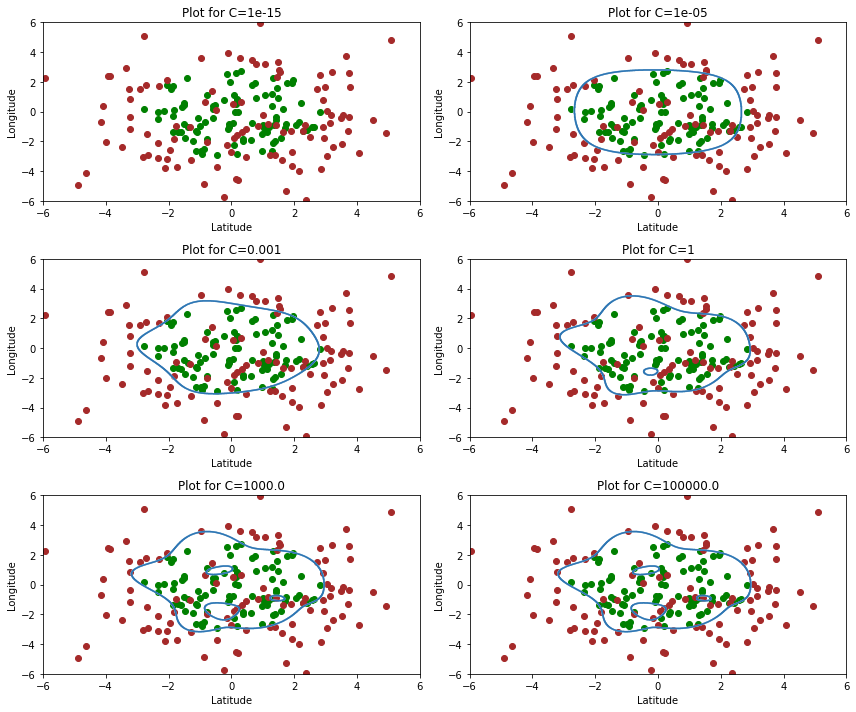

In [6]:
# We will use a custom function called fit_and_plot_dt
# If you are curious about it, look for the file `helper.py` in the root directory

from helper import fit_and_plot_dt

fig, ax = plt.subplots(nrows=int(len(Clist)/2), ncols=2,figsize=(12, 10))

ax = ax.ravel()

for i,d in enumerate(Clist):
    ax[i] = fit_and_plot_dt(X, y, d, 'Satellite',ax[i], plot_data=True, fill=False,degree=6) 
    ax[i].set_xlim(-6, 6)
    ax[i].set_ylim(-6, 6)
    ax[i].set_title(f'Plot for C={d}')
plt.tight_layout()
plt.show() 

## Try the same for varying degrees

In [7]:
# Make a logistic regression model with below given C value

degree_range = range(2,12)

degree_best_c = {}

#Make a list of 6 C values to vary the range of regularization such that you get the best accuracy

Clist = [1e-5,1e-4,1e-3,1e-2,0.1,1]#,1e3,1e5]


for degree in degree_range:
    validation_accuracy = []
    
    for i in Clist:

        # For each i in Clist, make a logistic regression model, with max_iter = 16000    
        lr = LogisticRegression(C=i, max_iter=16000)

        # Use Polynomial features to make a response variable of degree 10

        X_poly_train = PolynomialFeatures(degree).fit_transform(X_train)

        X_poly_val = PolynomialFeatures(degree).fit_transform(X_val)

        # Fit the model on the training data

        lr.fit(X_poly_train, y_train)

        # Predict the model on the validation data
        y_val_pred = lr.predict(X_poly_val)

        # Append the validation accuracy using the `accuracy_score` function
        validation_accuracy.append(accuracy_score(y_val, y_val_pred))

        #print("Accuracy=",validation_accuracy)
        best_C = Clist[validation_accuracy.index(max(validation_accuracy))]
    degree_best_c[degree] = best_C

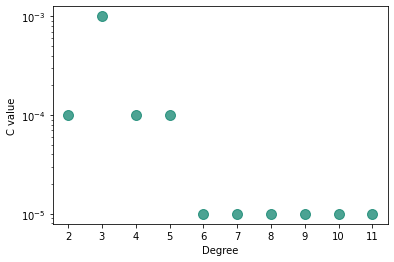

In [8]:
x = list(degree_best_c.keys())
y = list(degree_best_c.values())
plt.plot(x,y, 'o',color = '#007D66',alpha=0.7,markersize=10)
plt.yscale("log")
plt.xticks(degree_range)
plt.xlabel("Degree")
plt.ylabel("C value")
plt.show()

### Based on the plot, comment on the relationship between the Degree and C value of the model

**Your answer here**